## MODÜLLERİN İMPORT EDİLMESİ

In [1]:
from TbdyMaterialModels import Mander
from TBDYConfimentBarsRules import ConfimentDesign as cd

## KULLANILACAK DEĞERLER

In [2]:
"""Units N,mm"""
Nd                      = 16000 
B                       = 400
H                       = 400
s                       = 80
TieRebarDiameter        = 8
LongnitRebarDiameter    = 14
ClearCoverConc          = 25
NumBarsTop              = 2
NumBarsInterior         = 1
NumBarsBot              = 2
X_tiebars               = 2
Y_tiebars               = 3
fsy                     = 220
fywe                    = 220
eps_su                  = 0.08
f_co                    = 25
f_ce                    = 25
Fctd                    = 10
Ln                      = 2600

## TBDY2018 DİKDÖRTGEN KOLON SARGI DONATISI TASARIMI

In [3]:
ConfinmentDesign = cd(Nd, fsy, Fctd, Ln, B, H, ClearCoverConc, X_tiebars, Y_tiebars, f_co, fywe, TieRebarDiameter, LongnitRebarDiameter)

Kolon Serbest Bölgesindeki Etriye Adeti - Etriye Çapi / SarılmaDışıAralık / OrtaSarılmadakiAralık / UçSarılmaAralık = 42 - ∅8 / 16 / 5 / 5


In [4]:
s = ConfinmentDesign.s_OptEndConfArea
s

52

## TBDY2018 MALZEME MODELLERİ (EK-5A)

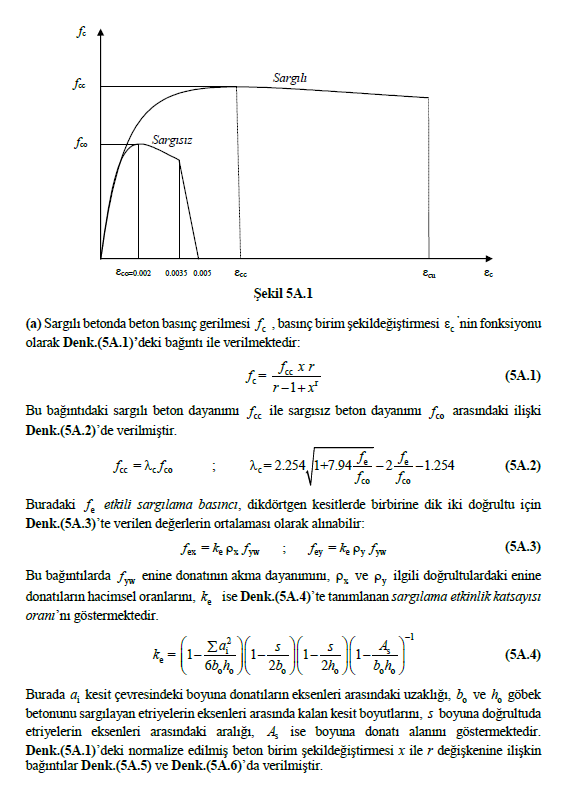    

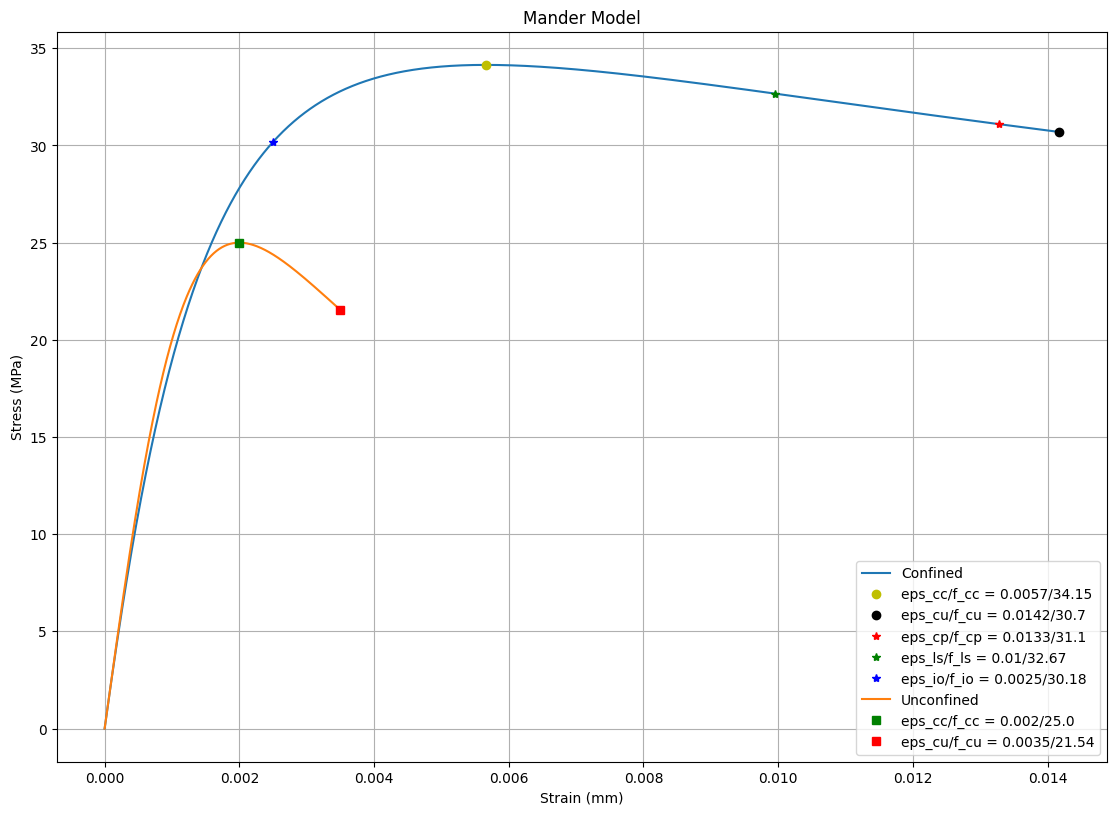

In [5]:
mander = Mander(B                    = B,
                H                    = H,
                s                    = s,
                TieRebarDiameter     = TieRebarDiameter,
                LongnitRebarDiameter = LongnitRebarDiameter,
                ClearCoverConc       = ClearCoverConc,
                NumBarsTop           = NumBarsTop,
                NumBarsInterior      = NumBarsInterior,
                NumBarsBot           = NumBarsBot,
                X_tiebars            = X_tiebars,
                Y_tiebars            = Y_tiebars,
                fsy                  = fsy,
                f_ywe                = fywe,
                eps_su               = eps_su,
                f_co                 = f_co,
                f_ce                 = f_ce
                )

mander.Plot_Manders()